In [ ]:
df = datasets.load_citibike(station=None)
from datetime import datetime
d = datetime.strptime(df.starttime[0],'%m/%d/%Y %H:%M:%S')
df = df.sample(10000)
datasets.add_citibike_extra_columns(df)


means = []
stes = []
years = range(1960,2010)
for by in years:
    yeardf = df.loc[df['birth year']==by]
    dist = 60*np.sqrt((yeardf['start station latitude']-yeardf['end station latitude'])**2 + (yeardf['start station longitude']-yeardf['end station longitude'])**2)
    a = dist/(yeardf['tripduration']/3600)    
    means.append(np.mean(a))
    stes.append(np.std(a)/np.sqrt(len(a)))
    
means = np.array(means)
stes = np.array(stes)
plt.plot(years,means)
plt.plot(years,means-stes*1.96)
plt.plot(years,means+stes*1.96)
plt.ylim([5,6])

boundarylist = [('hours',0,24*1,0.5), ('tripduration_mins',0,60.0,20.0)]
output,point_row_form,area_row_form,output_row_form,bins = dp4gp.bin_dataframe(df,boundarylist,verbose=True)

#output_row_form -= np.mean(output_row_form)
#output_row_form /= np.std(output_row_form)
kernel = GPy.kern.Multidimensional_Integral_Limits(input_dim=area_row_form.shape[1],lengthscale=[10.0,1.0],variances=[1.0])
m_int = GPy.models.GPRegression(1.0*area_row_form,1.0*output_row_form[:,None],kernel)
m_int.optimize(messages=True,max_iters=50)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
y = []
x = []
for h in np.arange(0,48,0.1):
    x.append(h)
    res,cov = m_int.predict_noiseless(np.array([[h+0.1,h,0.1,0.0]]))
    y.append(res[0][0])
plt.plot(x,np.array(y)*10) #x10 because step size during training was 0.5 x 20 = 10
plt.plot(area_row_form[area_row_form[:,2]==20,0]-1,output_row_form[area_row_form[:,2]==20])

### GP for DP version

In [ ]:
pseudo_inputs = sparse
lengthscales = 4000.0
sigma = np.ones_like(ys) * sens * 0.1
test_inputs = training_inputs
test_cov, normal_msense, pseudo_msense, normal_peroutput_msense, pseudo_peroutput_msense, normal_mu, pseudo_mu, K_normal, K_pseudo = dp4gp.get_noise_scale(ys,test_inputs,training_inputs,pseudo_inputs,lengthscales,sigma,calc_normal=True)

# High Dimensions

In [1]:
import dp4gp_datasets as datasets
import dp4gp
import GPy

import pandas as pd
import dp4gp_datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import dp4gp


df = datasets.load_citibike(station=None)
datasets.add_citibike_extra_columns(df)

warning in stationary: failed to import cython module: falling back to numpy


(-74.040000000000006,
 -73.920000000000016,
 40.659999999999997,
 40.799999999999997)

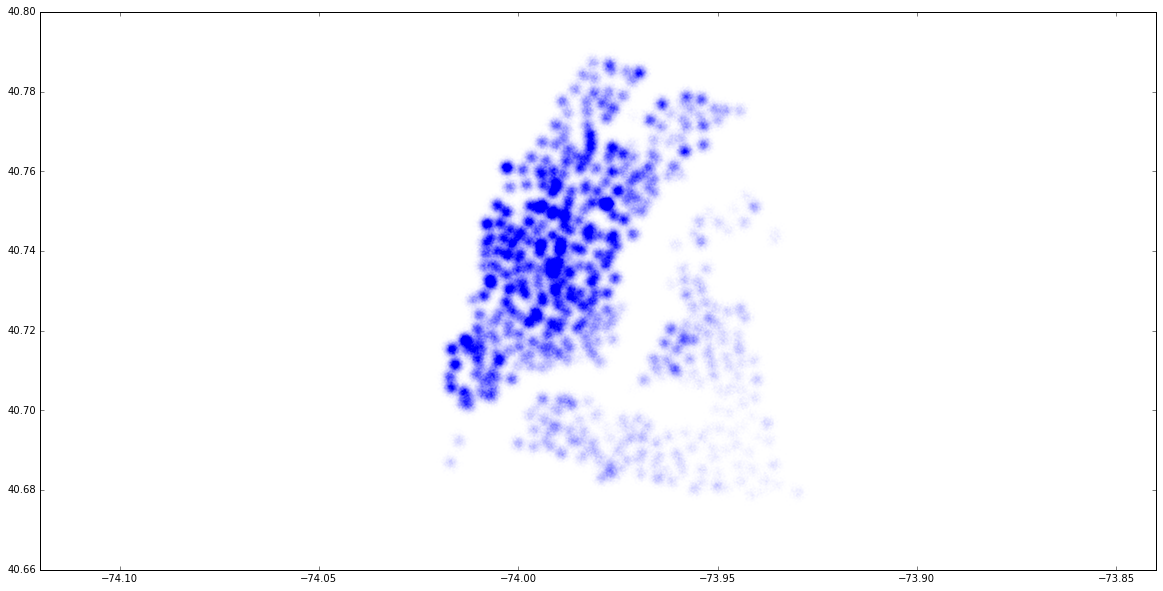

In [37]:

plt.figure(figsize=(20,10))
#plt.plot(df['start station longitude']+np.random.randn(len(df))*0.001,df['tripduration'],'.',markersize=3,alpha=0.01)
plt.plot(df['start station longitude']+np.random.randn(len(df))*0.001,df['start station latitude']+np.random.randn(len(df))*0.001,'.',markersize=1,alpha=0.01)
plt.axis('equal')
#plt.ylim([0,3600])

(0, 3600)

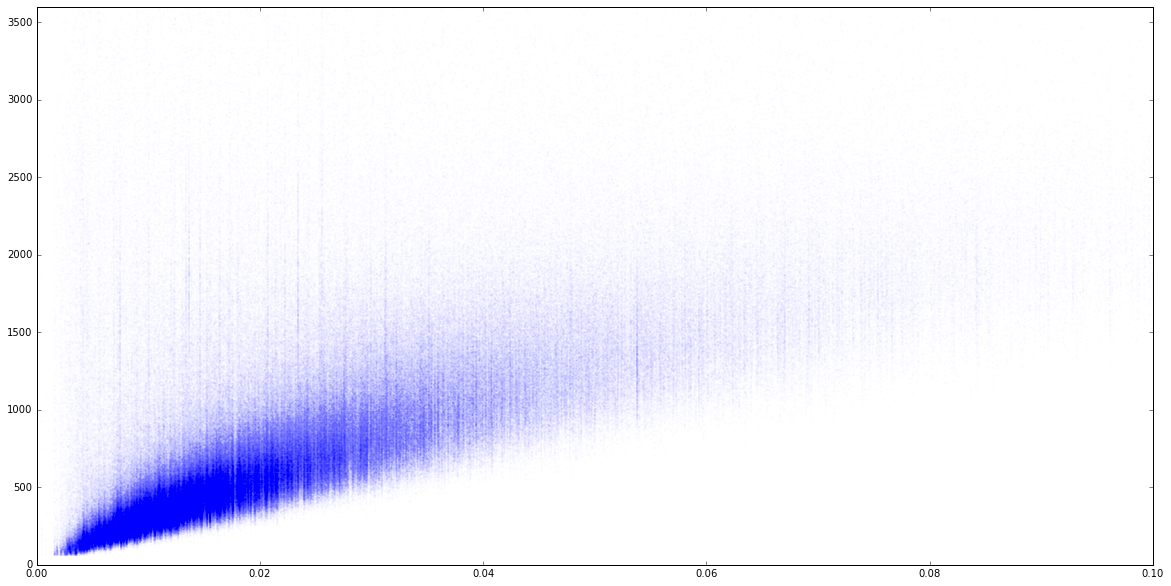

In [39]:
mandist = np.abs(df['start station latitude']-df['end station latitude'])+np.abs(df['start station longitude']-df['end station longitude'])
plt.figure(figsize=(20,10))
plt.plot(mandist,df['tripduration'],'.',markersize=1,alpha=0.03)
plt.xlim([0,0.1])
plt.ylim([0,3600])